# Sanity checks: dedicated binary classification dataset

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pylab as plt

In [4]:
DATA_PATH_TRAIN = "/export/share/krausef99dm/data/data_train/binary_class_balanced_train_9.0k_data.pkl"
DATA_PATH_VAL = "/export/share/krausef99dm/data/data_test/binary_class_balanced_val_9.0k_data.pkl"
DATA_PATH_TEST = "/export/share/krausef99dm/data/data_test/binary_class_balanced_test_9.0k_data.pkl"

tissue_ids, targets, targets_bin = {}, {}, {}

with (open(DATA_PATH_TRAIN, 'rb') as f):
    rna_data_raw_train, tissue_ids["train"], targets["train"], targets_bin["train"] = pickle.load(f)
with (open(DATA_PATH_VAL, 'rb') as f):
    rna_data_raw_val, tissue_ids["val"], targets["val"], targets_bin["val"] = pickle.load(f)
with (open(DATA_PATH_TEST, 'rb') as f):
    rna_data_raw_test, tissue_ids["test"], targets["test"], targets_bin["test"] = pickle.load(f)

In [5]:
#ENCODING = "nucl"
ENCODING = "codon"

rna_data = {}
if ENCODING == "nucl":
    rna_data["train"] = [d["nucleotide_rna_data"] for d in rna_data_raw_train]
    rna_data["val"] = [d["nucleotide_rna_data"] for d in rna_data_raw_val]
    rna_data["test"] = [d["nucleotide_rna_data"] for d in rna_data_raw_test]
elif ENCODING == "codon":
    rna_data["train"] = [d["codon_rna_data"] for d in rna_data_raw_train]
    rna_data["val"] = [d["codon_rna_data"] for d in rna_data_raw_val]
    rna_data["test"] = [d["codon_rna_data"] for d in rna_data_raw_test]
else:
    raise NotImplementedError()

## Checking max seq lens

In [22]:
dataset = "train"

In [47]:
rna_data[dataset][0]

tensor([12, 64, 47,  ..., 44, 31, 39])

In [49]:
# CODON
seq_lens = [len(s) * 3 for s in rna_data[dataset]]  # NOTE: need to triple len, as codon encoded
print(pd.Series(seq_lens).describe())

count    8660.000000
mean     1727.797344
std      1246.825562
min       135.000000
25%       879.000000
50%      1389.000000
75%      2211.000000
max      8442.000000
dtype: float64


In [68]:
# NUCL
seq_lens = [len(s[0]) for s in rna_data]
print(pd.Series(seq_lens).describe())

count    13066.000000
mean      3341.727767
std       1922.128078
min        303.000000
25%       1859.000000
50%       2946.000000
75%       4494.250000
max       8992.000000
dtype: float64


## Checking sequence length distributions

(array([436., 574., 296., 128.,  78.,  38.,  32.,  14.,   8.,   6.]),
 array([  52.,  317.,  582.,  847., 1112., 1377., 1642., 1907., 2172.,
        2437., 2702.]),
 <BarContainer object of 10 artists>)

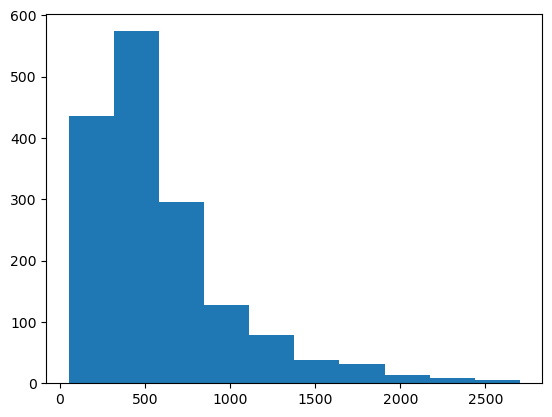

In [17]:
plt.hist(seq_lens)

In [24]:
len([len(s) for s in rna_data[dataset]])

8660

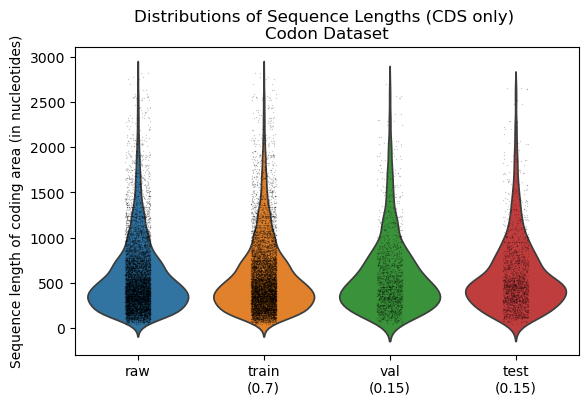

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [[len(s) for s in rna_data["train"]],
        [len(s) for s in rna_data["train"]],
        [len(s) for s in rna_data["val"]],
        [len(s) for s in rna_data["test"]]]

labels = ['raw', 'train\n(0.7)', 'val\n(0.15)', "test\n(0.15)"]

plt.figure(figsize=(6.5, 4))
sns.violinplot(data=data, inner=None)
sns.stripplot(data=data, color='black', size=1, jitter=True, alpha=0.2)
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.title("Distributions of Sequence Lengths (CDS only) \nCodon Dataset")
plt.ylabel("Sequence length of coding area (in nucleotides)")
plt.show()


## Checking inter tissue class balance

In [26]:
df = pd.DataFrame({"tissue_id": tissue_ids[dataset].tolist(), "targets_bin": targets_bin[dataset].tolist(), "targets": targets[dataset].tolist()})

In [34]:
grouped_df = df.groupby(["tissue_id", "targets_bin"]).targets.count()
grouped_df

tissue_id  targets_bin
0          1               90
           2               97
1          1              143
           2              152
2          1              171
           2              156
3          1              157
           2              160
4          1              108
           2              110
5          1               84
           2               83
6          1              123
           2              126
7          1              114
           2              120
8          1              160
           2              162
9          1              102
           2               95
10         1              199
           2              198
11         1              218
           2              215
12         1              155
           2              164
13         1              247
           2              245
14         1              135
           2              120
15         1              230
           2              223
16         1     

In [46]:
# Get the minimum value for each tissue_id
min_per_tissue = grouped_df.groupby("tissue_id").min()

# Sum all the minima
min_per_tissue.sum()

4242